<h1 style = "font-size:3rem;color:darkcyan"> Music genre classication - Train Model </h1>

In [1]:
# import libraries
import numpy as np
import tensorflow as tf
import json
from sklearn.model_selection import train_test_split
import sklearn
import matplotlib.pyplot as plt

In [2]:
# importing dataset (.json)
def import_dataset(dataset_path):
    
    # open json file
    with open(dataset_path, 'r') as f:
        data = json.load(f)
    
    # split list into different np arrays
    
    mappings = np.array(data['mappings']) 
    inputs = np.array(data['MFCC'])
    targets = np.array(data['labels'])
    filenames = np.array(data['filenames'])
    
    return mappings, inputs, targets, filenames

In [3]:
mappings, inputs, targets, filenames = import_dataset('data.json')

In [4]:
mappings

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype='<U9')

In [5]:
inputs.shape

(9981, 130, 13)

In [13]:
# split the data

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size = 0.3)

In [14]:
# create model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = [inputs.shape[1], inputs.shape[2]]),
    
    tf.keras.layers.Dense(1024, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(512, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(256, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(len(mappings), activation = 'softmax')
])

In [15]:
# compile model
learning_rate = 0.0001
optimiser = tf.keras.optimizers.Adam(learning_rate = learning_rate)
model.compile(optimizer = optimiser, 
              loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])


In [16]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1690)              0         
                                                                 
 dense_9 (Dense)             (None, 1024)              1731584   
                                                                 
 dropout_7 (Dropout)         (None, 1024)              0         
                                                                 
 dense_10 (Dense)            (None, 512)               524800    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)              

In [17]:
# train network
history = model.fit(x_train, y_train, 
          validation_data = (x_test,y_test),
          epochs = 100,
          batch_size = 32)

Epoch 1/100
219/219 [==============================] - 6s 20ms/step - loss: 22.2599 - accuracy: 0.1338 - val_loss: 4.5562 - val_accuracy: 0.1806
Epoch 2/100
219/219 [==============================] - 4s 19ms/step - loss: 7.1678 - accuracy: 0.1467 - val_loss: 4.6116 - val_accuracy: 0.1229
Epoch 3/100
219/219 [==============================] - 4s 19ms/step - loss: 5.4331 - accuracy: 0.1304 - val_loss: 4.5966 - val_accuracy: 0.1306
Epoch 4/100
219/219 [==============================] - 4s 19ms/step - loss: 4.9618 - accuracy: 0.1429 - val_loss: 4.5779 - val_accuracy: 0.1733
Epoch 5/100
219/219 [==============================] - 4s 19ms/step - loss: 4.8045 - accuracy: 0.1583 - val_loss: 4.5339 - val_accuracy: 0.2037
Epoch 6/100
219/219 [==============================] - 4s 19ms/step - loss: 4.6865 - accuracy: 0.1620 - val_loss: 4.4421 - val_accuracy: 0.2494
Epoch 7/100
219/219 [==============================] - 4s 19ms/step - loss: 4.5729 - accuracy: 0.1950 - val_loss: 4.3517 - val_accuracy

219/219 [==============================] - 4s 19ms/step - loss: 1.9564 - accuracy: 0.5886 - val_loss: 2.1818 - val_accuracy: 0.5603
Epoch 58/100
219/219 [==============================] - 4s 19ms/step - loss: 1.8909 - accuracy: 0.6009 - val_loss: 2.1505 - val_accuracy: 0.5623
Epoch 59/100
219/219 [==============================] - 4s 19ms/step - loss: 1.8713 - accuracy: 0.6082 - val_loss: 2.1306 - val_accuracy: 0.5743
Epoch 60/100
219/219 [==============================] - 4s 19ms/step - loss: 1.8390 - accuracy: 0.6096 - val_loss: 2.0642 - val_accuracy: 0.5856
Epoch 61/100
219/219 [==============================] - 4s 19ms/step - loss: 1.7986 - accuracy: 0.6214 - val_loss: 2.0682 - val_accuracy: 0.5706
Epoch 62/100
219/219 [==============================] - 4s 19ms/step - loss: 1.7693 - accuracy: 0.6327 - val_loss: 2.0963 - val_accuracy: 0.5786
Epoch 63/100
219/219 [==============================] - 4s 19ms/step - loss: 1.7495 - accuracy: 0.6222 - val_loss: 2.0286 - val_accuracy: 0.579

In [18]:
def plot_training_history(history, figsize = [15,6]):
    
    fig, ax = plt.subplots(2, figsize=figsize)
    
    # create accuracy subplot
    ax[0].plot(history.history['accuracy'], label = 'Training Accuracy')
    ax[0].plot(history.history['val_accuracy'], label = 'Testing Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].legend(loc='lower right')
    ax[0].set_title('Accuracy Evaluation')
    
    # create error subplot
    ax[1].plot(history.history['loss'], label = 'Training Error')
    ax[1].plot(history.history['val_loss'], label = 'Testing Error')
    ax[1].set_ylabel('Error')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(loc='upper right')
    ax[1].set_title('Error Evaluation')
    
    plt.show()

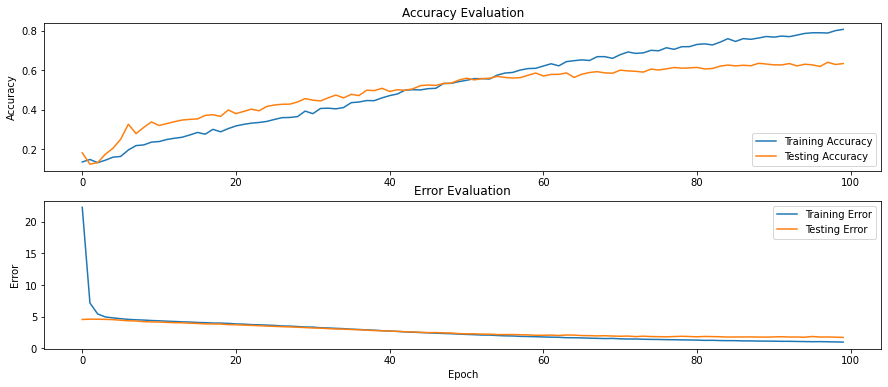

In [19]:
plot_training_history(history)

In [20]:
# evaluate model
print('Model evaluation: ')
model.evaluate(x_test, y_test, verbose = True)

Model evaluation: 
94/94 [==============================] - 1s 7ms/step - loss: 1.7289 - accuracy: 0.6337


[1.7288566827774048, 0.6337228417396545]

In [21]:
y_pred = model.predict(x_test)

94/94 [==============================] - 1s 6ms/step


In [22]:
pred_classes = np.argmax(y_pred, axis=1)
pred_classes.shape

(2995,)

In [23]:
y_test.shape

(2995,)

In [24]:
mappings.shape

(10,)

In [25]:
# visualize confusion matrix

def plot_confusion_matrix(true_target, predicted_target, classes, normalize = None, cmap= 'PuBu', size = [6,6], fontsize=9):
    # get confusion matrix
    labels = np.arange(0,len(classes), 1)
    cm = sklearn.metrics.confusion_matrix(true_target, predicted_target, labels = labels)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized Confusion Matrix'
    else:
        title = 'Absolute Confusion Matrix'
        
    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap= cmap)
    ax.figure.colorbar(im, ax=ax)
    
    
    # set labels ticks
    ticks = np.arange(cm.shape[1])
    ax.set(xticks=ticks,
           yticks=ticks,
           xticklabels=classes, 
           yticklabels=classes,
          )
    
    ax.set_title(title, fontsize = 20)
    ax.set_ylabel('True Class', fontsize = fontsize)
    ax.set_xlabel('Predicted Class', fontsize = fontsize)
     
    # style tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor", color = 'darkgrey', fontsize = fontsize)
    plt.setp(ax.get_yticklabels(), ha="right",
             rotation_mode="anchor", color = 'darkgrey', fontsize = fontsize)
    
    # plot text annotation inside each segment
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontsize = fontsize)

    fig.tight_layout()
    plt.show()

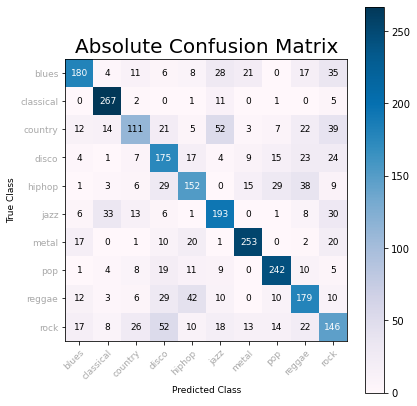

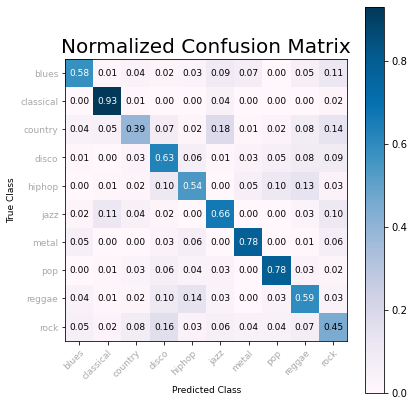

In [26]:
plot_confusion_matrix(y_test, pred_classes, classes = mappings, size = [6,6], normalize = False)
plot_confusion_matrix(y_test, pred_classes, classes = mappings, size = [6,6], normalize = True)